# Add oblique trees to new figures
In addtion to other algorithms (SVM, MLP, RF) and human, the oblique tree (RERF) is added to the list for comparison.

In [1]:
# changing cwd
%cd ..

/home/jmshin/Desktop/workstation/extrapolation


## Load packages

In [2]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ /home/jmshin/Desktop/workstation/extrapolation/clf/SimulationData.pickle ] loaded
[ /home/jmshin/Desktop/workstation/extrapolation/clf/PosteriorData.pickle ] loaded
[ /home/jmshin/Desktop/workstation/extrapolation/clf/TrainedCLF.pickle ] loaded
[ /home/jmshin/Desktop/workstation/extrapolation/clf/EstimatedData.pickle ] loaded
[ /home/jmshin/Desktop/workstation/extrapolation/clf/HellingerData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


In [3]:
# ib.load_sampledData()

## Time and Date of the experiment

In [4]:
print(ib.date)

2021-09-22 04:16:37.186549


## Load Dependencies

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
# import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from mpl_toolkits.axes_grid1 import AxesGrid

cmap = 'PRGn'

# for figure 3
import matplotlib as mpl
from matplotlib.lines import Line2D #only for the purpose of creating the legend

import warnings
warnings.filterwarnings('ignore')

### MORF implemented version of the SPORF package is installed from Adam Li's [dev branch](https://github.com/adam2392/SPORF/tree/dev/mtorf)

In [6]:
import rerf
from rerf.rerfClassifier import rerfClassifier

rerf.check_version()

'2.0.5'

## Extract human coordinates

In [7]:
ib.extract_human_coord()

User sequence match and dataframe exported


In [8]:
ib.humanLoc[0][0].head()

,3,5
336,-2.59,0.74
337,0.56,1.55
338,-2.05,-0.7
339,2.27,-1.78
340,1.46,-0.61


## Retraining ML models and predicting exactly the same xy coordinates from human experiment

In [9]:
ib.mask = ib.generate_mask(h=0.1)
ib.mask.shape

(3600, 2)

In [10]:
clf_sporf = rerfClassifier(
    projection_matrix='RerF',
    n_jobs=-1,
    n_estimators=128,
    max_features='auto',
    max_depth=10
) #SPORF parameters

clf_morf = rerfClassifier(
    projection_matrix='MT-MORF',
    n_jobs=-1,
    n_estimators=128,
    max_features='auto',
    max_depth=10,
    image_height=1,
    image_width=2,
    patch_height_max=1,
    patch_height_min=1,
    patch_width_max=1,
    patch_width_min=1
) #MORF parameters

In [11]:
ib.clf[1][2], ib.clf[1][4]

([NuSVC(probability=True),
  MLPClassifier(alpha=0, learning_rate_init=0.0001, max_iter=10000,
                solver='lbfgs'),
  RandomForestClassifier(max_depth=10, n_estimators=128, n_jobs=-1),
  QuadraticDiscriminantAnalysis()],
 [NuSVC(gamma='auto', probability=True),
  MLPClassifier(alpha=0, hidden_layer_sizes=100, learning_rate_init=0.0001,
                max_iter=7000),
  RandomForestClassifier(max_depth=10, n_estimators=128, n_jobs=-1),
  QuadraticDiscriminantAnalysis()])

In [12]:
#generic global
uX = ib.mask
uX0, uX1 = uX[:,0], uX[:,1]
label = ib.mtype + ['HUMAN'] #excluding QDA
dtype = ib.dtype[2:5:2]
fsize = 18

#retrain global
reps = 126
saved_clf = ib.clf #using already optimized hyper-parameter from previous models
N_sample = 100 #same number of samples that of human
h = 0.1
rng = 3

#train
TRAIN_NOW = True

#figure
SAVEFIG = True

In [13]:
saved_clf[1][2][3] = clf_sporf
saved_clf[1][2].append(clf_morf)

saved_clf[1][4][3] = clf_sporf
saved_clf[1][4].append(clf_morf)

In [14]:
# run only for the first time
if TRAIN_NOW:
    ib.get_sampledData(saved_clf=saved_clf, reps=reps, N_sample=N_sample, h=0.1, rng=3)

rep:   0%|          | 0/126 [00:00<?, ?it/s]

starting tree 1
max depth: 10
avg leaf node depth: 6.38065
avg num leaf nodes per tree: 21
num leaf nodes: 2811
starting tree 1
max depth: 10
avg leaf node depth: 6.47974
avg num leaf nodes per tree: 21
num leaf nodes: 2764


starting tree 1
max depth: 10
avg leaf node depth: 5.09355
avg num leaf nodes per tree: 13
num leaf nodes: 1721
starting tree 1
max depth: 10
avg leaf node depth: 4.88386
avg num leaf nodes per tree: 12
num leaf nodes: 1636


rep:   1%|          | 1/126 [00:10<20:53, 10.03s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.87603
avg num leaf nodes per tree: 22
num leaf nodes: 2912
starting tree 1
max depth: 10
avg leaf node depth: 5.87883
avg num leaf nodes per tree: 22
num leaf nodes: 2938


starting tree 1
max depth: 10
avg leaf node depth: 4.8319
avg num leaf nodes per tree: 13
num leaf nodes: 1749
starting tree 1
max depth: 10
avg leaf node depth: 4.69481
avg num leaf nodes per tree: 12
num leaf nodes: 1658


rep:   2%|▏         | 2/126 [00:20<20:54, 10.11s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.27803
avg num leaf nodes per tree: 20
num leaf nodes: 2640
starting tree 1
max depth: 10
avg leaf node depth: 6.26312
avg num leaf nodes per tree: 20
num leaf nodes: 2649


starting tree 1
max depth: 10
avg leaf node depth: 4.3178
avg num leaf nodes per tree: 11
num leaf nodes: 1416
starting tree 1
max depth: 10
avg leaf node depth: 4.41137
avg num leaf nodes per tree: 11
num leaf nodes: 1478


rep:   2%|▏         | 3/126 [00:33<23:46, 11.60s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.68925
avg num leaf nodes per tree: 21
num leaf nodes: 2716
starting tree 1
max depth: 10
avg leaf node depth: 5.69982
avg num leaf nodes per tree: 21
num leaf nodes: 2775


starting tree 1
max depth: 10
avg leaf node depth: 4.94814
avg num leaf nodes per tree: 13
num leaf nodes: 1716
starting tree 1
max depth: 10
avg leaf node depth: 5.10249
avg num leaf nodes per tree: 13
num leaf nodes: 1766


rep:   3%|▎         | 4/126 [00:41<20:46, 10.22s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.9693
avg num leaf nodes per tree: 22
num leaf nodes: 2834
starting tree 1
max depth: 10
avg leaf node depth: 6.0507
avg num leaf nodes per tree: 21
num leaf nodes: 2722


starting tree 1
max depth: 10
avg leaf node depth: 4.75259
avg num leaf nodes per tree: 12
num leaf nodes: 1641
starting tree 1
max depth: 10
avg leaf node depth: 4.92135
avg num leaf nodes per tree: 13
num leaf nodes: 1691


rep:   4%|▍         | 5/126 [00:50<19:33,  9.70s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.98868
avg num leaf nodes per tree: 22
num leaf nodes: 2916
starting tree 1
max depth: 10
avg leaf node depth: 5.97112
avg num leaf nodes per tree: 22
num leaf nodes: 2943


starting tree 1
max depth: 10
avg leaf node depth: 4.74762
avg num leaf nodes per tree: 13
num leaf nodes: 1684
starting tree 1
max depth: 10
avg leaf node depth: 4.8194
avg num leaf nodes per tree: 13
num leaf nodes: 1711


rep:   5%|▍         | 6/126 [00:57<17:26,  8.72s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.25124
avg num leaf nodes per tree: 21
num leaf nodes: 2814
starting tree 1
max depth: 10
avg leaf node depth: 6.33872
avg num leaf nodes per tree: 22
num leaf nodes: 2911


starting tree 1
max depth: 10
avg leaf node depth: 4.84939
avg num leaf nodes per tree: 12
num leaf nodes: 1640
starting tree 1
max depth: 10
avg leaf node depth: 4.71104
avg num leaf nodes per tree: 13
num leaf nodes: 1675


rep:   6%|▌         | 7/126 [01:07<18:02,  9.10s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.20863
avg num leaf nodes per tree: 22
num leaf nodes: 2828
starting tree 1
max depth: 10
avg leaf node depth: 6.23512
avg num leaf nodes per tree: 21
num leaf nodes: 2739


starting tree 1
max depth: 10
avg leaf node depth: 4.33935
avg num leaf nodes per tree: 11
num leaf nodes: 1497
starting tree 1
max depth: 10
avg leaf node depth: 4.57395
avg num leaf nodes per tree: 12
num leaf nodes: 1589


rep:   6%|▋         | 8/126 [01:17<18:42,  9.51s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.84187
avg num leaf nodes per tree: 22
num leaf nodes: 2928
starting tree 1
max depth: 10
avg leaf node depth: 5.92511
avg num leaf nodes per tree: 22
num leaf nodes: 2844


starting tree 1
max depth: 10
avg leaf node depth: 4.93974
avg num leaf nodes per tree: 13
num leaf nodes: 1759
starting tree 1
max depth: 10
avg leaf node depth: 4.93889
avg num leaf nodes per tree: 13
num leaf nodes: 1751


rep:   7%|▋         | 9/126 [01:26<18:00,  9.23s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.91858
avg num leaf nodes per tree: 22
num leaf nodes: 2874
starting tree 1
max depth: 10
avg leaf node depth: 6.01749
avg num leaf nodes per tree: 22
num leaf nodes: 2859


starting tree 1
max depth: 10
avg leaf node depth: 5.05506
avg num leaf nodes per tree: 14
num leaf nodes: 1798
starting tree 1
max depth: 10
avg leaf node depth: 4.95735
avg num leaf nodes per tree: 13
num leaf nodes: 1782


rep:   8%|▊         | 10/126 [01:36<18:36,  9.63s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.33441
avg num leaf nodes per tree: 21
num leaf nodes: 2778
starting tree 1
max depth: 10
avg leaf node depth: 6.37405
avg num leaf nodes per tree: 21
num leaf nodes: 2759


starting tree 1
max depth: 10
avg leaf node depth: 4.71135
avg num leaf nodes per tree: 12
num leaf nodes: 1604
starting tree 1
max depth: 10
avg leaf node depth: 4.80774
avg num leaf nodes per tree: 12
num leaf nodes: 1628


rep:   9%|▊         | 11/126 [01:46<18:22,  9.59s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.16515
avg num leaf nodes per tree: 23
num leaf nodes: 2961
starting tree 1
max depth: 10
avg leaf node depth: 6.22599
avg num leaf nodes per tree: 22
num leaf nodes: 2916


starting tree 1
max depth: 10
avg leaf node depth: 4.53493
avg num leaf nodes per tree: 12
num leaf nodes: 1589
starting tree 1
max depth: 10
avg leaf node depth: 4.51978
avg num leaf nodes per tree: 12
num leaf nodes: 1643


rep:  10%|▉         | 12/126 [01:57<19:06, 10.06s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.10832
avg num leaf nodes per tree: 23
num leaf nodes: 2945
starting tree 1
max depth: 10
avg leaf node depth: 6.1284
avg num leaf nodes per tree: 23
num leaf nodes: 2944


starting tree 1
max depth: 10
avg leaf node depth: 4.80452
avg num leaf nodes per tree: 13
num leaf nodes: 1683
starting tree 1
max depth: 10
avg leaf node depth: 4.86526
avg num leaf nodes per tree: 13
num leaf nodes: 1707


rep:  10%|█         | 13/126 [02:07<18:50, 10.01s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.35562
avg num leaf nodes per tree: 24
num leaf nodes: 3096
starting tree 1
max depth: 10
avg leaf node depth: 6.33267
avg num leaf nodes per tree: 23
num leaf nodes: 3027


starting tree 1
max depth: 10
avg leaf node depth: 4.85571
avg num leaf nodes per tree: 13
num leaf nodes: 1691
starting tree 1
max depth: 10
avg leaf node depth: 4.91739
avg num leaf nodes per tree: 13
num leaf nodes: 1719


rep:  11%|█         | 14/126 [02:18<19:12, 10.29s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.1471
avg num leaf nodes per tree: 25
num leaf nodes: 3263
starting tree 1
max depth: 10
avg leaf node depth: 6.11275
avg num leaf nodes per tree: 25
num leaf nodes: 3255


starting tree 1
max depth: 10
avg leaf node depth: 4.82093
avg num leaf nodes per tree: 12
num leaf nodes: 1653
starting tree 1
max depth: 10
avg leaf node depth: 4.71138
avg num leaf nodes per tree: 12
num leaf nodes: 1573


rep:  12%|█▏        | 15/126 [02:27<18:47, 10.15s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.89975
avg num leaf nodes per tree: 21
num leaf nodes: 2813
starting tree 1
max depth: 10
avg leaf node depth: 5.81999
avg num leaf nodes per tree: 22
num leaf nodes: 2822


starting tree 1
max depth: 10
avg leaf node depth: 4.79364
avg num leaf nodes per tree: 13
num leaf nodes: 1730
starting tree 1
max depth: 10
avg leaf node depth: 4.86971
avg num leaf nodes per tree: 13
num leaf nodes: 1750


rep:  13%|█▎        | 16/126 [02:37<18:25, 10.05s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.03741
avg num leaf nodes per tree: 21
num leaf nodes: 2807
starting tree 1
max depth: 10
avg leaf node depth: 6.08073
avg num leaf nodes per tree: 21
num leaf nodes: 2812


starting tree 1
max depth: 10
avg leaf node depth: 4.94286
avg num leaf nodes per tree: 13
num leaf nodes: 1785
starting tree 1
max depth: 10
avg leaf node depth: 4.89449
avg num leaf nodes per tree: 13
num leaf nodes: 1706


rep:  13%|█▎        | 17/126 [02:47<18:02,  9.93s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.06386
avg num leaf nodes per tree: 23
num leaf nodes: 2944
starting tree 1
max depth: 10
avg leaf node depth: 5.92004
avg num leaf nodes per tree: 22
num leaf nodes: 2939


starting tree 1
max depth: 10
avg leaf node depth: 4.33333
avg num leaf nodes per tree: 11
num leaf nodes: 1491
starting tree 1
max depth: 10
avg leaf node depth: 4.47952
avg num leaf nodes per tree: 12
num leaf nodes: 1587


rep:  14%|█▍        | 18/126 [02:56<17:15,  9.58s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.60708
avg num leaf nodes per tree: 20
num leaf nodes: 2657
starting tree 1
max depth: 10
avg leaf node depth: 6.49125
avg num leaf nodes per tree: 20
num leaf nodes: 2628


starting tree 1
max depth: 10
avg leaf node depth: 4.6642
avg num leaf nodes per tree: 12
num leaf nodes: 1623
starting tree 1
max depth: 10
avg leaf node depth: 4.69156
avg num leaf nodes per tree: 12
num leaf nodes: 1647


rep:  15%|█▌        | 19/126 [03:06<17:38,  9.89s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.17785
avg num leaf nodes per tree: 21
num leaf nodes: 2772
starting tree 1
max depth: 10
avg leaf node depth: 6.17155
avg num leaf nodes per tree: 22
num leaf nodes: 2903


starting tree 1
max depth: 10
avg leaf node depth: 4.34253
avg num leaf nodes per tree: 11
num leaf nodes: 1486
starting tree 1
max depth: 10
avg leaf node depth: 4.66395
avg num leaf nodes per tree: 12
num leaf nodes: 1595


rep:  16%|█▌        | 20/126 [03:18<18:28, 10.45s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.11726
avg num leaf nodes per tree: 22
num leaf nodes: 2908
starting tree 1
max depth: 10
avg leaf node depth: 6.16418
avg num leaf nodes per tree: 23
num leaf nodes: 2948


starting tree 1
max depth: 10
avg leaf node depth: 5.08361
avg num leaf nodes per tree: 13
num leaf nodes: 1782
starting tree 1
max depth: 10
avg leaf node depth: 5.21152
avg num leaf nodes per tree: 14
num leaf nodes: 1858


rep:  17%|█▋        | 21/126 [03:29<18:18, 10.46s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.48926
avg num leaf nodes per tree: 22
num leaf nodes: 2841
starting tree 1
max depth: 10
avg leaf node depth: 6.47972
avg num leaf nodes per tree: 21
num leaf nodes: 2762


starting tree 1
max depth: 10
avg leaf node depth: 5.0695
avg num leaf nodes per tree: 13
num leaf nodes: 1741
starting tree 1
max depth: 10
avg leaf node depth: 5.13051
avg num leaf nodes per tree: 14
num leaf nodes: 1793


rep:  17%|█▋        | 22/126 [03:39<18:15, 10.54s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.95203
avg num leaf nodes per tree: 22
num leaf nodes: 2877
starting tree 1
max depth: 10
avg leaf node depth: 6.03914
avg num leaf nodes per tree: 23
num leaf nodes: 2989


starting tree 1
max depth: 10
avg leaf node depth: 4.76656
avg num leaf nodes per tree: 12
num leaf nodes: 1585
starting tree 1
max depth: 10
avg leaf node depth: 4.84982
avg num leaf nodes per tree: 12
num leaf nodes: 1638


rep:  18%|█▊        | 23/126 [03:49<17:49, 10.38s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.94822
avg num leaf nodes per tree: 24
num leaf nodes: 3109
starting tree 1
max depth: 10
avg leaf node depth: 6.05504
avg num leaf nodes per tree: 24
num leaf nodes: 3143


starting tree 1
max depth: 10
avg leaf node depth: 5.0459
avg num leaf nodes per tree: 14
num leaf nodes: 1852
starting tree 1
max depth: 10
avg leaf node depth: 5.07981
avg num leaf nodes per tree: 14
num leaf nodes: 1892


rep:  19%|█▉        | 24/126 [03:59<17:12, 10.12s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.17479
avg num leaf nodes per tree: 22
num leaf nodes: 2872
starting tree 1
max depth: 10
avg leaf node depth: 6.15071
avg num leaf nodes per tree: 22
num leaf nodes: 2873


starting tree 1
max depth: 10
avg leaf node depth: 4.81846
avg num leaf nodes per tree: 12
num leaf nodes: 1647
starting tree 1
max depth: 10
avg leaf node depth: 4.69414
avg num leaf nodes per tree: 12
num leaf nodes: 1553


rep:  20%|█▉        | 25/126 [04:08<16:43,  9.93s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.0756
avg num leaf nodes per tree: 22
num leaf nodes: 2897
starting tree 1
max depth: 10
avg leaf node depth: 6.06837
avg num leaf nodes per tree: 22
num leaf nodes: 2896


starting tree 1
max depth: 10
avg leaf node depth: 4.94502
avg num leaf nodes per tree: 13
num leaf nodes: 1746
starting tree 1
max depth: 10
avg leaf node depth: 5.05543
avg num leaf nodes per tree: 13
num leaf nodes: 1786


rep:  21%|██        | 26/126 [04:18<16:23,  9.84s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.91598
avg num leaf nodes per tree: 23
num leaf nodes: 3047
starting tree 1
max depth: 10
avg leaf node depth: 6.0487
avg num leaf nodes per tree: 24
num leaf nodes: 3080


starting tree 1
max depth: 10
avg leaf node depth: 4.79621
avg num leaf nodes per tree: 12
num leaf nodes: 1634
starting tree 1
max depth: 10
avg leaf node depth: 4.73759
avg num leaf nodes per tree: 12
num leaf nodes: 1612


rep:  21%|██▏       | 27/126 [04:28<16:07,  9.78s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.39202
avg num leaf nodes per tree: 21
num leaf nodes: 2806
starting tree 1
max depth: 10
avg leaf node depth: 6.20349
avg num leaf nodes per tree: 21
num leaf nodes: 2752


starting tree 1
max depth: 10
avg leaf node depth: 5.00801
avg num leaf nodes per tree: 14
num leaf nodes: 1873
starting tree 1
max depth: 10
avg leaf node depth: 5.05402
avg num leaf nodes per tree: 14
num leaf nodes: 1814


rep:  22%|██▏       | 28/126 [04:38<16:10,  9.91s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.36394
avg num leaf nodes per tree: 23
num leaf nodes: 2951
starting tree 1
max depth: 10
avg leaf node depth: 6.41223
avg num leaf nodes per tree: 22
num leaf nodes: 2877


starting tree 1
max depth: 10
avg leaf node depth: 4.67045
avg num leaf nodes per tree: 13
num leaf nodes: 1672
starting tree 1
max depth: 10
avg leaf node depth: 4.79375
avg num leaf nodes per tree: 13
num leaf nodes: 1697


rep:  23%|██▎       | 29/126 [04:48<16:18, 10.09s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.36433
avg num leaf nodes per tree: 22
num leaf nodes: 2904
starting tree 1
max depth: 10
avg leaf node depth: 6.46606
avg num leaf nodes per tree: 23
num leaf nodes: 2961


starting tree 1
max depth: 10
avg leaf node depth: 4.71707
avg num leaf nodes per tree: 11
num leaf nodes: 1488
starting tree 1
max depth: 10
avg leaf node depth: 4.66934
avg num leaf nodes per tree: 11
num leaf nodes: 1497


rep:  24%|██▍       | 30/126 [04:58<16:11, 10.11s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.17249
avg num leaf nodes per tree: 26
num leaf nodes: 3351
starting tree 1
max depth: 10
avg leaf node depth: 6.15239
avg num leaf nodes per tree: 24
num leaf nodes: 3163


starting tree 1
max depth: 10
avg leaf node depth: 4.86967
avg num leaf nodes per tree: 13
num leaf nodes: 1734
starting tree 1
max depth: 10
avg leaf node depth: 4.9674
avg num leaf nodes per tree: 13
num leaf nodes: 1779


rep:  25%|██▍       | 31/126 [05:08<15:36,  9.85s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.99074
avg num leaf nodes per tree: 21
num leaf nodes: 2808
starting tree 1
max depth: 10
avg leaf node depth: 6.02189
avg num leaf nodes per tree: 21
num leaf nodes: 2787


starting tree 1
max depth: 10
avg leaf node depth: 5.03592
avg num leaf nodes per tree: 13
num leaf nodes: 1754
starting tree 1
max depth: 10
avg leaf node depth: 4.98562
avg num leaf nodes per tree: 13
num leaf nodes: 1739


rep:  25%|██▌       | 32/126 [05:17<15:23,  9.83s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.27941
avg num leaf nodes per tree: 22
num leaf nodes: 2899
starting tree 1
max depth: 10
avg leaf node depth: 6.11798
avg num leaf nodes per tree: 22
num leaf nodes: 2831


starting tree 1
max depth: 10
avg leaf node depth: 4.68951
avg num leaf nodes per tree: 12
num leaf nodes: 1620
starting tree 1
max depth: 10
avg leaf node depth: 4.70655
avg num leaf nodes per tree: 12
num leaf nodes: 1663


rep:  26%|██▌       | 33/126 [05:28<15:25,  9.95s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.33253
avg num leaf nodes per tree: 22
num leaf nodes: 2911
starting tree 1
max depth: 10
avg leaf node depth: 6.29581
avg num leaf nodes per tree: 22
num leaf nodes: 2816


starting tree 1
max depth: 10
avg leaf node depth: 4.79149
avg num leaf nodes per tree: 13
num leaf nodes: 1669
starting tree 1
max depth: 10
avg leaf node depth: 4.42916
avg num leaf nodes per tree: 11
num leaf nodes: 1461


rep:  27%|██▋       | 34/126 [05:38<15:14,  9.95s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.14441
avg num leaf nodes per tree: 22
num leaf nodes: 2860
starting tree 1
max depth: 10
avg leaf node depth: 6.12115
avg num leaf nodes per tree: 22
num leaf nodes: 2889


starting tree 1
max depth: 10
avg leaf node depth: 5.23556
avg num leaf nodes per tree: 14
num leaf nodes: 1800
starting tree 1
max depth: 10
avg leaf node depth: 5.1882
avg num leaf nodes per tree: 14
num leaf nodes: 1796


rep:  28%|██▊       | 35/126 [05:48<15:18, 10.09s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.88365
avg num leaf nodes per tree: 23
num leaf nodes: 2948
starting tree 1
max depth: 10
avg leaf node depth: 5.9892
avg num leaf nodes per tree: 23
num leaf nodes: 2964


starting tree 1
max depth: 10
avg leaf node depth: 5.07567
avg num leaf nodes per tree: 14
num leaf nodes: 1837
starting tree 1
max depth: 10
avg leaf node depth: 5.14923
avg num leaf nodes per tree: 14
num leaf nodes: 1816


rep:  29%|██▊       | 36/126 [05:57<14:40,  9.79s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.20352
avg num leaf nodes per tree: 22
num leaf nodes: 2840
starting tree 1
max depth: 10
avg leaf node depth: 6.05018
avg num leaf nodes per tree: 22
num leaf nodes: 2850


starting tree 1
max depth: 10
avg leaf node depth: 4.80251
avg num leaf nodes per tree: 13
num leaf nodes: 1671
starting tree 1
max depth: 10
avg leaf node depth: 4.75752
avg num leaf nodes per tree: 12
num leaf nodes: 1662


rep:  29%|██▉       | 37/126 [06:05<13:49,  9.32s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.41249
avg num leaf nodes per tree: 22
num leaf nodes: 2914
starting tree 1
max depth: 10
avg leaf node depth: 6.36884
avg num leaf nodes per tree: 22
num leaf nodes: 2901


starting tree 1
max depth: 10
avg leaf node depth: 4.78279
avg num leaf nodes per tree: 13
num leaf nodes: 1685
starting tree 1
max depth: 10
avg leaf node depth: 4.57727
avg num leaf nodes per tree: 12
num leaf nodes: 1540


rep:  30%|███       | 38/126 [06:12<12:32,  8.55s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.23203
avg num leaf nodes per tree: 21
num leaf nodes: 2810
starting tree 1
max depth: 10
avg leaf node depth: 6.32167
avg num leaf nodes per tree: 21
num leaf nodes: 2773


starting tree 1
max depth: 10
avg leaf node depth: 5
avg num leaf nodes per tree: 13
num leaf nodes: 1789
starting tree 1
max depth: 10
avg leaf node depth: 4.78545
avg num leaf nodes per tree: 12
num leaf nodes: 1636


rep:  31%|███       | 39/126 [06:19<11:49,  8.15s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.86357
avg num leaf nodes per tree: 22
num leaf nodes: 2932
starting tree 1
max depth: 10
avg leaf node depth: 5.87475
avg num leaf nodes per tree: 23
num leaf nodes: 3026


starting tree 1
max depth: 10
avg leaf node depth: 4.42867
avg num leaf nodes per tree: 11
num leaf nodes: 1500
starting tree 1
max depth: 10
avg leaf node depth: 4.47101
avg num leaf nodes per tree: 11
num leaf nodes: 1518


rep:  32%|███▏      | 40/126 [06:29<12:11,  8.51s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.02866
avg num leaf nodes per tree: 23
num leaf nodes: 2966
starting tree 1
max depth: 10
avg leaf node depth: 6.1911
avg num leaf nodes per tree: 23
num leaf nodes: 2967


starting tree 1
max depth: 10
avg leaf node depth: 4.79726
avg num leaf nodes per tree: 13
num leaf nodes: 1677
starting tree 1
max depth: 10
avg leaf node depth: 4.93685
avg num leaf nodes per tree: 13
num leaf nodes: 1726


rep:  33%|███▎      | 41/126 [06:35<11:14,  7.94s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.98726
avg num leaf nodes per tree: 23
num leaf nodes: 3061
starting tree 1
max depth: 10
avg leaf node depth: 6.13453
avg num leaf nodes per tree: 23
num leaf nodes: 3055


starting tree 1
max depth: 10
avg leaf node depth: 5.26533
avg num leaf nodes per tree: 13
num leaf nodes: 1745
starting tree 1
max depth: 10
avg leaf node depth: 5.22279
avg num leaf nodes per tree: 13
num leaf nodes: 1764


rep:  33%|███▎      | 42/126 [06:42<10:25,  7.44s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.03407
avg num leaf nodes per tree: 22
num leaf nodes: 2847
starting tree 1
max depth: 10
avg leaf node depth: 6.10618
avg num leaf nodes per tree: 22
num leaf nodes: 2863


starting tree 1
max depth: 10
avg leaf node depth: 4.80237
avg num leaf nodes per tree: 13
num leaf nodes: 1690
starting tree 1
max depth: 10
avg leaf node depth: 4.87337
avg num leaf nodes per tree: 13
num leaf nodes: 1690


rep:  34%|███▍      | 43/126 [06:48<10:01,  7.25s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.91401
avg num leaf nodes per tree: 24
num leaf nodes: 3140
starting tree 1
max depth: 10
avg leaf node depth: 6.0247
avg num leaf nodes per tree: 24
num leaf nodes: 3158


starting tree 1
max depth: 10
avg leaf node depth: 4.8032
avg num leaf nodes per tree: 12
num leaf nodes: 1626
starting tree 1
max depth: 10
avg leaf node depth: 4.77042
avg num leaf nodes per tree: 12
num leaf nodes: 1616


rep:  35%|███▍      | 44/126 [06:55<09:34,  7.01s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.12316
avg num leaf nodes per tree: 23
num leaf nodes: 2988
starting tree 1
max depth: 10
avg leaf node depth: 6.14358
avg num leaf nodes per tree: 23
num leaf nodes: 2953


starting tree 1
max depth: 10
avg leaf node depth: 4.45301
avg num leaf nodes per tree: 12
num leaf nodes: 1543
starting tree 1
max depth: 10
avg leaf node depth: 4.4
avg num leaf nodes per tree: 12
num leaf nodes: 1545


rep:  36%|███▌      | 45/126 [07:02<09:34,  7.09s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.34739
avg num leaf nodes per tree: 22
num leaf nodes: 2870
starting tree 1
max depth: 10
avg leaf node depth: 6.33662
avg num leaf nodes per tree: 22
num leaf nodes: 2843


starting tree 1
max depth: 10
avg leaf node depth: 4.93842
avg num leaf nodes per tree: 13
num leaf nodes: 1770
starting tree 1
max depth: 10
avg leaf node depth: 4.83774
avg num leaf nodes per tree: 13
num leaf nodes: 1701


rep:  37%|███▋      | 46/126 [07:10<09:35,  7.19s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.89817
avg num leaf nodes per tree: 20
num leaf nodes: 2681
starting tree 1
max depth: 10
avg leaf node depth: 5.95309
avg num leaf nodes per tree: 20
num leaf nodes: 2686


starting tree 1
max depth: 10
avg leaf node depth: 4.85748
avg num leaf nodes per tree: 13
num leaf nodes: 1705
starting tree 1
max depth: 10
avg leaf node depth: 5.03864
avg num leaf nodes per tree: 13
num leaf nodes: 1760


rep:  37%|███▋      | 47/126 [07:16<09:09,  6.96s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.19768
avg num leaf nodes per tree: 22
num leaf nodes: 2929
starting tree 1
max depth: 10
avg leaf node depth: 6.34772
avg num leaf nodes per tree: 22
num leaf nodes: 2850


starting tree 1
max depth: 10
avg leaf node depth: 4.95866
avg num leaf nodes per tree: 13
num leaf nodes: 1766
starting tree 1
max depth: 10
avg leaf node depth: 4.72074
avg num leaf nodes per tree: 13
num leaf nodes: 1683


rep:  38%|███▊      | 48/126 [07:23<08:58,  6.90s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.04386
avg num leaf nodes per tree: 23
num leaf nodes: 2987
starting tree 1
max depth: 10
avg leaf node depth: 6.05324
avg num leaf nodes per tree: 23
num leaf nodes: 3005


starting tree 1
max depth: 10
avg leaf node depth: 4.39059
avg num leaf nodes per tree: 11
num leaf nodes: 1531
starting tree 1
max depth: 10
avg leaf node depth: 4.41095
avg num leaf nodes per tree: 11
num leaf nodes: 1516


rep:  39%|███▉      | 49/126 [07:29<08:47,  6.85s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.139
avg num leaf nodes per tree: 23
num leaf nodes: 3036
starting tree 1
max depth: 10
avg leaf node depth: 6.15327
avg num leaf nodes per tree: 23
num leaf nodes: 2949


starting tree 1
max depth: 10
avg leaf node depth: 4.74342
avg num leaf nodes per tree: 12
num leaf nodes: 1633
starting tree 1
max depth: 10
avg leaf node depth: 4.82217
avg num leaf nodes per tree: 12
num leaf nodes: 1597


rep:  40%|███▉      | 50/126 [07:36<08:34,  6.77s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.93356
avg num leaf nodes per tree: 20
num leaf nodes: 2649
starting tree 1
max depth: 10
avg leaf node depth: 5.97851
avg num leaf nodes per tree: 20
num leaf nodes: 2606


starting tree 1
max depth: 10
avg leaf node depth: 5.48105
avg num leaf nodes per tree: 15
num leaf nodes: 1979
starting tree 1
max depth: 10
avg leaf node depth: 5.4034
avg num leaf nodes per tree: 14
num leaf nodes: 1884


rep:  40%|████      | 51/126 [07:42<08:20,  6.67s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.21139
avg num leaf nodes per tree: 22
num leaf nodes: 2933
starting tree 1
max depth: 10
avg leaf node depth: 6.2453
avg num leaf nodes per tree: 22
num leaf nodes: 2927


starting tree 1
max depth: 10
avg leaf node depth: 5.3194
avg num leaf nodes per tree: 14
num leaf nodes: 1866
starting tree 1
max depth: 10
avg leaf node depth: 5.20941
avg num leaf nodes per tree: 13
num leaf nodes: 1786


rep:  41%|████▏     | 52/126 [07:49<08:14,  6.68s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.29324
avg num leaf nodes per tree: 23
num leaf nodes: 3001
starting tree 1
max depth: 10
avg leaf node depth: 6.17867
avg num leaf nodes per tree: 23
num leaf nodes: 3028


starting tree 1
max depth: 10
avg leaf node depth: 5.06143
avg num leaf nodes per tree: 14
num leaf nodes: 1807
starting tree 1
max depth: 10
avg leaf node depth: 4.97469
avg num leaf nodes per tree: 14
num leaf nodes: 1857


rep:  42%|████▏     | 53/126 [07:56<08:09,  6.71s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.17522
avg num leaf nodes per tree: 23
num leaf nodes: 3019
starting tree 1
max depth: 10
avg leaf node depth: 6.27121
avg num leaf nodes per tree: 23
num leaf nodes: 3053


starting tree 1
max depth: 10
avg leaf node depth: 4.55144
avg num leaf nodes per tree: 12
num leaf nodes: 1594
starting tree 1
max depth: 10
avg leaf node depth: 4.51905
avg num leaf nodes per tree: 11
num leaf nodes: 1522


rep:  43%|████▎     | 54/126 [08:03<08:01,  6.69s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.0567
avg num leaf nodes per tree: 22
num leaf nodes: 2857
starting tree 1
max depth: 10
avg leaf node depth: 6.00358
avg num leaf nodes per tree: 21
num leaf nodes: 2794


starting tree 1
max depth: 10
avg leaf node depth: 4.89602
avg num leaf nodes per tree: 13
num leaf nodes: 1760
starting tree 1
max depth: 10
avg leaf node depth: 4.74636
avg num leaf nodes per tree: 13
num leaf nodes: 1715


rep:  44%|████▎     | 55/126 [08:10<07:59,  6.75s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.27092
avg num leaf nodes per tree: 22
num leaf nodes: 2820
starting tree 1
max depth: 10
avg leaf node depth: 6.23139
avg num leaf nodes per tree: 21
num leaf nodes: 2727


starting tree 1
max depth: 10
avg leaf node depth: 4.9828
avg num leaf nodes per tree: 13
num leaf nodes: 1744
starting tree 1
max depth: 10
avg leaf node depth: 5.01815
avg num leaf nodes per tree: 13
num leaf nodes: 1763


rep:  44%|████▍     | 56/126 [08:16<07:43,  6.62s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.04262
avg num leaf nodes per tree: 23
num leaf nodes: 3003
starting tree 1
max depth: 10
avg leaf node depth: 6.15462
avg num leaf nodes per tree: 23
num leaf nodes: 2975


starting tree 1
max depth: 10
avg leaf node depth: 5.14796
avg num leaf nodes per tree: 13
num leaf nodes: 1764
starting tree 1
max depth: 10
avg leaf node depth: 4.93988
avg num leaf nodes per tree: 13
num leaf nodes: 1763


rep:  45%|████▌     | 57/126 [08:22<07:30,  6.53s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.36782
avg num leaf nodes per tree: 21
num leaf nodes: 2735
starting tree 1
max depth: 10
avg leaf node depth: 6.37505
avg num leaf nodes per tree: 21
num leaf nodes: 2717


starting tree 1
max depth: 10
avg leaf node depth: 5.08243
avg num leaf nodes per tree: 13
num leaf nodes: 1747
starting tree 1
max depth: 10
avg leaf node depth: 4.97249
avg num leaf nodes per tree: 13
num leaf nodes: 1745


rep:  46%|████▌     | 58/126 [08:29<07:38,  6.74s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.23161
avg num leaf nodes per tree: 23
num leaf nodes: 3031
starting tree 1
max depth: 10
avg leaf node depth: 6.18944
avg num leaf nodes per tree: 23
num leaf nodes: 2993


starting tree 1
max depth: 10
avg leaf node depth: 4.62746
avg num leaf nodes per tree: 12
num leaf nodes: 1624
starting tree 1
max depth: 10
avg leaf node depth: 4.53934
avg num leaf nodes per tree: 12
num leaf nodes: 1576


rep:  47%|████▋     | 59/126 [08:36<07:37,  6.82s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.90712
avg num leaf nodes per tree: 22
num leaf nodes: 2853
starting tree 1
max depth: 10
avg leaf node depth: 5.80388
avg num leaf nodes per tree: 23
num leaf nodes: 2988


starting tree 1
max depth: 10
avg leaf node depth: 5.16648
avg num leaf nodes per tree: 14
num leaf nodes: 1814
starting tree 1
max depth: 10
avg leaf node depth: 5.12179
avg num leaf nodes per tree: 14
num leaf nodes: 1831


rep:  48%|████▊     | 60/126 [08:43<07:26,  6.77s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.22797
avg num leaf nodes per tree: 21
num leaf nodes: 2746
starting tree 1
max depth: 10
avg leaf node depth: 6.14316
avg num leaf nodes per tree: 21
num leaf nodes: 2815


starting tree 1
max depth: 10
avg leaf node depth: 5.11302
avg num leaf nodes per tree: 13
num leaf nodes: 1743
starting tree 1
max depth: 10
avg leaf node depth: 5.00417
avg num leaf nodes per tree: 13
num leaf nodes: 1678


rep:  48%|████▊     | 61/126 [08:50<07:20,  6.78s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.02445
avg num leaf nodes per tree: 21
num leaf nodes: 2781
starting tree 1
max depth: 10
avg leaf node depth: 6.04351
avg num leaf nodes per tree: 21
num leaf nodes: 2804


starting tree 1
max depth: 10
avg leaf node depth: 4.85043
avg num leaf nodes per tree: 12
num leaf nodes: 1638
starting tree 1
max depth: 10
avg leaf node depth: 4.76847
avg num leaf nodes per tree: 12
num leaf nodes: 1624


rep:  49%|████▉     | 62/126 [08:57<07:22,  6.92s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.25746
avg num leaf nodes per tree: 22
num leaf nodes: 2882
starting tree 1
max depth: 10
avg leaf node depth: 6.27617
avg num leaf nodes per tree: 22
num leaf nodes: 2875


starting tree 1
max depth: 10
avg leaf node depth: 4.75106
avg num leaf nodes per tree: 12
num leaf nodes: 1655
starting tree 1
max depth: 10
avg leaf node depth: 4.84939
avg num leaf nodes per tree: 13
num leaf nodes: 1713


rep:  50%|█████     | 63/126 [09:04<07:20,  6.99s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.23641
avg num leaf nodes per tree: 22
num leaf nodes: 2906
starting tree 1
max depth: 10
avg leaf node depth: 6.12645
avg num leaf nodes per tree: 22
num leaf nodes: 2847


starting tree 1
max depth: 10
avg leaf node depth: 4.63516
avg num leaf nodes per tree: 12
num leaf nodes: 1661
starting tree 1
max depth: 10
avg leaf node depth: 4.77036
avg num leaf nodes per tree: 13
num leaf nodes: 1707


rep:  51%|█████     | 64/126 [09:11<07:12,  6.97s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.97102
avg num leaf nodes per tree: 24
num leaf nodes: 3140
starting tree 1
max depth: 10
avg leaf node depth: 5.99837
avg num leaf nodes per tree: 23
num leaf nodes: 3065


starting tree 1
max depth: 10
avg leaf node depth: 5.02147
avg num leaf nodes per tree: 13
num leaf nodes: 1770
starting tree 1
max depth: 10
avg leaf node depth: 4.99021
avg num leaf nodes per tree: 13
num leaf nodes: 1737


rep:  52%|█████▏    | 65/126 [09:18<06:55,  6.82s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.13956
avg num leaf nodes per tree: 23
num leaf nodes: 3031
starting tree 1
max depth: 10
avg leaf node depth: 6.24604
avg num leaf nodes per tree: 23
num leaf nodes: 3028


starting tree 1
max depth: 10
avg leaf node depth: 4.7555
avg num leaf nodes per tree: 12
num leaf nodes: 1591
starting tree 1
max depth: 10
avg leaf node depth: 4.95179
avg num leaf nodes per tree: 13
num leaf nodes: 1701


rep:  52%|█████▏    | 66/126 [09:24<06:45,  6.75s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.08149
avg num leaf nodes per tree: 21
num leaf nodes: 2810
starting tree 1
max depth: 10
avg leaf node depth: 6.05639
avg num leaf nodes per tree: 21
num leaf nodes: 2784


starting tree 1
max depth: 10
avg leaf node depth: 5.0752
avg num leaf nodes per tree: 13
num leaf nodes: 1742
starting tree 1
max depth: 10
avg leaf node depth: 4.98286
avg num leaf nodes per tree: 13
num leaf nodes: 1692


rep:  53%|█████▎    | 67/126 [09:32<06:55,  7.04s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.07258
avg num leaf nodes per tree: 22
num leaf nodes: 2921
starting tree 1
max depth: 10
avg leaf node depth: 6.05701
avg num leaf nodes per tree: 23
num leaf nodes: 2947


starting tree 1
max depth: 10
avg leaf node depth: 4.75563
avg num leaf nodes per tree: 13
num leaf nodes: 1731
starting tree 1
max depth: 10
avg leaf node depth: 4.88266
avg num leaf nodes per tree: 13
num leaf nodes: 1713


rep:  54%|█████▍    | 68/126 [09:39<06:44,  6.97s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.21438
avg num leaf nodes per tree: 23
num leaf nodes: 2976
starting tree 1
max depth: 10
avg leaf node depth: 6.2224
avg num leaf nodes per tree: 24
num leaf nodes: 3134


starting tree 1
max depth: 10
avg leaf node depth: 4.34407
avg num leaf nodes per tree: 12
num leaf nodes: 1552
starting tree 1
max depth: 9
avg leaf node depth: 4.24189
avg num leaf nodes per tree: 12
num leaf nodes: 1542


rep:  55%|█████▍    | 69/126 [09:46<06:39,  7.02s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.53402
avg num leaf nodes per tree: 20
num leaf nodes: 2631
starting tree 1
max depth: 10
avg leaf node depth: 6.42777
avg num leaf nodes per tree: 20
num leaf nodes: 2679


starting tree 1
max depth: 10
avg leaf node depth: 4.90557
avg num leaf nodes per tree: 13
num leaf nodes: 1705
starting tree 1
max depth: 10
avg leaf node depth: 4.94067
avg num leaf nodes per tree: 13
num leaf nodes: 1736


rep:  56%|█████▌    | 70/126 [09:53<06:35,  7.07s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.84783
avg num leaf nodes per tree: 22
num leaf nodes: 2885
starting tree 1
max depth: 10
avg leaf node depth: 5.84998
avg num leaf nodes per tree: 22
num leaf nodes: 2873


starting tree 1
max depth: 10
avg leaf node depth: 4.63302
avg num leaf nodes per tree: 12
num leaf nodes: 1605
starting tree 1
max depth: 10
avg leaf node depth: 4.66707
avg num leaf nodes per tree: 13
num leaf nodes: 1664


rep:  56%|█████▋    | 71/126 [10:00<06:22,  6.95s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.12074
avg num leaf nodes per tree: 24
num leaf nodes: 3172
starting tree 1
max depth: 10
avg leaf node depth: 6.15713
avg num leaf nodes per tree: 24
num leaf nodes: 3163


starting tree 1
max depth: 10
avg leaf node depth: 4.84659
avg num leaf nodes per tree: 13
num leaf nodes: 1747
starting tree 1
max depth: 10
avg leaf node depth: 4.86215
avg num leaf nodes per tree: 13
num leaf nodes: 1712


rep:  57%|█████▋    | 72/126 [10:06<06:04,  6.76s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.85304
avg num leaf nodes per tree: 22
num leaf nodes: 2892
starting tree 1
max depth: 10
avg leaf node depth: 5.92952
avg num leaf nodes per tree: 22
num leaf nodes: 2852


starting tree 1
max depth: 10
avg leaf node depth: 5.03284
avg num leaf nodes per tree: 13
num leaf nodes: 1766
starting tree 1
max depth: 10
avg leaf node depth: 5.03496
avg num leaf nodes per tree: 14
num leaf nodes: 1802


rep:  58%|█████▊    | 73/126 [10:13<06:09,  6.97s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.35584
avg num leaf nodes per tree: 22
num leaf nodes: 2858
starting tree 1
max depth: 10
avg leaf node depth: 6.25498
avg num leaf nodes per tree: 22
num leaf nodes: 2910


starting tree 1
max depth: 10
avg leaf node depth: 4.56104
avg num leaf nodes per tree: 12
num leaf nodes: 1581
starting tree 1
max depth: 10
avg leaf node depth: 4.75148
avg num leaf nodes per tree: 13
num leaf nodes: 1694


rep:  59%|█████▊    | 74/126 [10:21<06:03,  6.98s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.45464
avg num leaf nodes per tree: 22
num leaf nodes: 2877
starting tree 1
max depth: 10
avg leaf node depth: 6.46464
avg num leaf nodes per tree: 22
num leaf nodes: 2899


starting tree 1
max depth: 10
avg leaf node depth: 4.3815
avg num leaf nodes per tree: 11
num leaf nodes: 1481
starting tree 1
max depth: 10
avg leaf node depth: 4.5894
avg num leaf nodes per tree: 12
num leaf nodes: 1566


rep:  60%|█████▉    | 75/126 [10:28<06:01,  7.08s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.02367
avg num leaf nodes per tree: 23
num leaf nodes: 3000
starting tree 1
max depth: 10
avg leaf node depth: 6.02216
avg num leaf nodes per tree: 23
num leaf nodes: 3024


starting tree 1
max depth: 10
avg leaf node depth: 4.79032
avg num leaf nodes per tree: 13
num leaf nodes: 1674
starting tree 1
max depth: 10
avg leaf node depth: 4.76899
avg num leaf nodes per tree: 12
num leaf nodes: 1619


rep:  60%|██████    | 76/126 [10:35<05:52,  7.06s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.09155
avg num leaf nodes per tree: 22
num leaf nodes: 2829
starting tree 1
max depth: 10
avg leaf node depth: 6.04729
avg num leaf nodes per tree: 22
num leaf nodes: 2897


starting tree 1
max depth: 10
avg leaf node depth: 4.8924
avg num leaf nodes per tree: 13
num leaf nodes: 1710
starting tree 1
max depth: 10
avg leaf node depth: 4.67271
avg num leaf nodes per tree: 12
num leaf nodes: 1656


rep:  61%|██████    | 77/126 [10:41<05:38,  6.90s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.40952
avg num leaf nodes per tree: 23
num leaf nodes: 2962
starting tree 1
max depth: 10
avg leaf node depth: 6.37032
avg num leaf nodes per tree: 23
num leaf nodes: 2992


starting tree 1
max depth: 10
avg leaf node depth: 4.67746
avg num leaf nodes per tree: 12
num leaf nodes: 1637
starting tree 1
max depth: 10
avg leaf node depth: 4.75319
avg num leaf nodes per tree: 13
num leaf nodes: 1726


rep:  62%|██████▏   | 78/126 [10:48<05:21,  6.70s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.59021
avg num leaf nodes per tree: 23
num leaf nodes: 2982
starting tree 1
max depth: 10
avg leaf node depth: 6.52023
avg num leaf nodes per tree: 22
num leaf nodes: 2818


starting tree 1
max depth: 10
avg leaf node depth: 4.95161
avg num leaf nodes per tree: 14
num leaf nodes: 1798
starting tree 1
max depth: 10
avg leaf node depth: 4.96985
avg num leaf nodes per tree: 13
num leaf nodes: 1758


rep:  63%|██████▎   | 79/126 [10:54<05:13,  6.67s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.42684
avg num leaf nodes per tree: 21
num leaf nodes: 2802
starting tree 1
max depth: 10
avg leaf node depth: 6.61264
avg num leaf nodes per tree: 21
num leaf nodes: 2690


starting tree 1
max depth: 10
avg leaf node depth: 4.64614
avg num leaf nodes per tree: 12
num leaf nodes: 1608
starting tree 1
max depth: 10
avg leaf node depth: 4.63642
avg num leaf nodes per tree: 12
num leaf nodes: 1598


rep:  63%|██████▎   | 80/126 [11:01<05:15,  6.86s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.41251
avg num leaf nodes per tree: 21
num leaf nodes: 2749
starting tree 1
max depth: 10
avg leaf node depth: 6.40489
avg num leaf nodes per tree: 21
num leaf nodes: 2739


starting tree 1
max depth: 10
avg leaf node depth: 4.43072
avg num leaf nodes per tree: 11
num leaf nodes: 1530
starting tree 1
max depth: 10
avg leaf node depth: 4.72131
avg num leaf nodes per tree: 12
num leaf nodes: 1647


rep:  64%|██████▍   | 81/126 [11:08<05:09,  6.88s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.29034
avg num leaf nodes per tree: 22
num leaf nodes: 2931
starting tree 1
max depth: 10
avg leaf node depth: 6.42827
avg num leaf nodes per tree: 22
num leaf nodes: 2844


starting tree 1
max depth: 10
avg leaf node depth: 4.96585
avg num leaf nodes per tree: 13
num leaf nodes: 1757
starting tree 1
max depth: 10
avg leaf node depth: 4.79685
avg num leaf nodes per tree: 13
num leaf nodes: 1713


rep:  65%|██████▌   | 82/126 [11:16<05:08,  7.00s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.39002
avg num leaf nodes per tree: 21
num leaf nodes: 2805
starting tree 1
max depth: 10
avg leaf node depth: 6.45645
avg num leaf nodes per tree: 21
num leaf nodes: 2813


starting tree 1
max depth: 10
avg leaf node depth: 4.61214
avg num leaf nodes per tree: 12
num leaf nodes: 1565
starting tree 1
max depth: 10
avg leaf node depth: 4.59082
avg num leaf nodes per tree: 12
num leaf nodes: 1591


rep:  66%|██████▌   | 83/126 [11:23<04:59,  6.96s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.42438
avg num leaf nodes per tree: 24
num leaf nodes: 3101
starting tree 1
max depth: 10
avg leaf node depth: 6.44099
avg num leaf nodes per tree: 24
num leaf nodes: 3118


starting tree 1
max depth: 10
avg leaf node depth: 5.13487
avg num leaf nodes per tree: 14
num leaf nodes: 1861
starting tree 1
max depth: 10
avg leaf node depth: 5.13959
avg num leaf nodes per tree: 13
num leaf nodes: 1791


rep:  67%|██████▋   | 84/126 [11:30<04:53,  6.99s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.9588
avg num leaf nodes per tree: 22
num leaf nodes: 2864
starting tree 1
max depth: 10
avg leaf node depth: 5.93218
avg num leaf nodes per tree: 22
num leaf nodes: 2890


starting tree 1
max depth: 10
avg leaf node depth: 4.65487
avg num leaf nodes per tree: 12
num leaf nodes: 1611
starting tree 1
max depth: 10
avg leaf node depth: 4.74
avg num leaf nodes per tree: 12
num leaf nodes: 1650


rep:  67%|██████▋   | 85/126 [11:37<04:45,  6.97s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.08753
avg num leaf nodes per tree: 22
num leaf nodes: 2902
starting tree 1
max depth: 10
avg leaf node depth: 5.96698
avg num leaf nodes per tree: 22
num leaf nodes: 2907


starting tree 1
max depth: 10
avg leaf node depth: 5.26678
avg num leaf nodes per tree: 13
num leaf nodes: 1698
starting tree 1
max depth: 10
avg leaf node depth: 5.34949
avg num leaf nodes per tree: 13
num leaf nodes: 1754


rep:  68%|██████▊   | 86/126 [11:43<04:32,  6.82s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.98653
avg num leaf nodes per tree: 23
num leaf nodes: 2970
starting tree 1
max depth: 10
avg leaf node depth: 5.91057
avg num leaf nodes per tree: 23
num leaf nodes: 3019


starting tree 1
max depth: 10
avg leaf node depth: 5.13489
avg num leaf nodes per tree: 14
num leaf nodes: 1794
starting tree 1
max depth: 10
avg leaf node depth: 4.9678
avg num leaf nodes per tree: 13
num leaf nodes: 1739


rep:  69%|██████▉   | 87/126 [11:50<04:22,  6.74s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.36656
avg num leaf nodes per tree: 21
num leaf nodes: 2739
starting tree 1
max depth: 10
avg leaf node depth: 6.26954
avg num leaf nodes per tree: 22
num leaf nodes: 2827


starting tree 1
max depth: 10
avg leaf node depth: 5.07351
avg num leaf nodes per tree: 14
num leaf nodes: 1850
starting tree 1
max depth: 10
avg leaf node depth: 4.98789
avg num leaf nodes per tree: 14
num leaf nodes: 1816


rep:  70%|██████▉   | 88/126 [11:56<04:16,  6.74s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.17455
avg num leaf nodes per tree: 22
num leaf nodes: 2939
starting tree 1
max depth: 10
avg leaf node depth: 6.06778
avg num leaf nodes per tree: 22
num leaf nodes: 2921


starting tree 1
max depth: 10
avg leaf node depth: 4.89288
avg num leaf nodes per tree: 13
num leaf nodes: 1727
starting tree 1
max depth: 10
avg leaf node depth: 5.00342
avg num leaf nodes per tree: 13
num leaf nodes: 1754


rep:  71%|███████   | 89/126 [12:03<04:10,  6.78s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.90173
avg num leaf nodes per tree: 22
num leaf nodes: 2829
starting tree 1
max depth: 10
avg leaf node depth: 5.79414
avg num leaf nodes per tree: 22
num leaf nodes: 2832


starting tree 1
max depth: 10
avg leaf node depth: 5.21209
avg num leaf nodes per tree: 14
num leaf nodes: 1853
starting tree 1
max depth: 10
avg leaf node depth: 5.07555
avg num leaf nodes per tree: 13
num leaf nodes: 1734


rep:  71%|███████▏  | 90/126 [12:10<04:07,  6.88s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.11585
avg num leaf nodes per tree: 20
num leaf nodes: 2650
starting tree 1
max depth: 10
avg leaf node depth: 6.03675
avg num leaf nodes per tree: 21
num leaf nodes: 2721


starting tree 1
max depth: 10
avg leaf node depth: 4.98107
avg num leaf nodes per tree: 14
num leaf nodes: 1796
starting tree 1
max depth: 10
avg leaf node depth: 5.05763
avg num leaf nodes per tree: 13
num leaf nodes: 1770


rep:  72%|███████▏  | 91/126 [12:17<03:53,  6.68s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.17025
avg num leaf nodes per tree: 22
num leaf nodes: 2837
starting tree 1
max depth: 10
avg leaf node depth: 6.18504
avg num leaf nodes per tree: 21
num leaf nodes: 2794


starting tree 1
max depth: 10
avg leaf node depth: 5.04778
avg num leaf nodes per tree: 13
num leaf nodes: 1779
starting tree 1
max depth: 10
avg leaf node depth: 4.88535
avg num leaf nodes per tree: 12
num leaf nodes: 1631


rep:  73%|███████▎  | 92/126 [12:23<03:48,  6.71s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.12553
avg num leaf nodes per tree: 23
num leaf nodes: 3043
starting tree 1
max depth: 10
avg leaf node depth: 6.03544
avg num leaf nodes per tree: 24
num leaf nodes: 3104


starting tree 1
max depth: 10
avg leaf node depth: 4.91411
avg num leaf nodes per tree: 13
num leaf nodes: 1758
starting tree 1
max depth: 10
avg leaf node depth: 4.84404
avg num leaf nodes per tree: 13
num leaf nodes: 1712


rep:  74%|███████▍  | 93/126 [12:31<03:53,  7.07s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.01315
avg num leaf nodes per tree: 21
num leaf nodes: 2813
starting tree 1
max depth: 10
avg leaf node depth: 6.06055
avg num leaf nodes per tree: 22
num leaf nodes: 2857


starting tree 1
max depth: 10
avg leaf node depth: 5.04287
avg num leaf nodes per tree: 13
num leaf nodes: 1726
starting tree 1
max depth: 10
avg leaf node depth: 4.96338
avg num leaf nodes per tree: 13
num leaf nodes: 1693


rep:  75%|███████▍  | 94/126 [12:38<03:41,  6.92s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.47583
avg num leaf nodes per tree: 21
num leaf nodes: 2772
starting tree 1
max depth: 10
avg leaf node depth: 6.45788
avg num leaf nodes per tree: 22
num leaf nodes: 2861


starting tree 1
max depth: 10
avg leaf node depth: 4.70029
avg num leaf nodes per tree: 13
num leaf nodes: 1695
starting tree 1
max depth: 10
avg leaf node depth: 4.85722
avg num leaf nodes per tree: 13
num leaf nodes: 1779


rep:  75%|███████▌  | 95/126 [12:45<03:37,  7.01s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.32549
avg num leaf nodes per tree: 21
num leaf nodes: 2762
starting tree 1
max depth: 10
avg leaf node depth: 6.20719
avg num leaf nodes per tree: 21
num leaf nodes: 2809


starting tree 1
max depth: 10
avg leaf node depth: 4.91819
avg num leaf nodes per tree: 13
num leaf nodes: 1699
starting tree 1
max depth: 10
avg leaf node depth: 5.02378
avg num leaf nodes per tree: 13
num leaf nodes: 1766


rep:  76%|███████▌  | 96/126 [12:51<03:24,  6.82s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.25839
avg num leaf nodes per tree: 21
num leaf nodes: 2771
starting tree 1
max depth: 10
avg leaf node depth: 6.1187
avg num leaf nodes per tree: 21
num leaf nodes: 2797


starting tree 1
max depth: 10
avg leaf node depth: 4.8165
avg num leaf nodes per tree: 12
num leaf nodes: 1624
starting tree 1
max depth: 10
avg leaf node depth: 4.93432
avg num leaf nodes per tree: 13
num leaf nodes: 1690


rep:  77%|███████▋  | 97/126 [12:59<03:21,  6.95s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.36003
avg num leaf nodes per tree: 23
num leaf nodes: 2972
starting tree 1
max depth: 10
avg leaf node depth: 6.26464
avg num leaf nodes per tree: 23
num leaf nodes: 3023


starting tree 1
max depth: 10
avg leaf node depth: 4.57921
avg num leaf nodes per tree: 12
num leaf nodes: 1635
starting tree 1
max depth: 10
avg leaf node depth: 4.54272
avg num leaf nodes per tree: 12
num leaf nodes: 1627


rep:  78%|███████▊  | 98/126 [13:07<03:23,  7.28s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.02566
avg num leaf nodes per tree: 23
num leaf nodes: 3001
starting tree 1
max depth: 10
avg leaf node depth: 6.03884
avg num leaf nodes per tree: 23
num leaf nodes: 2961


starting tree 1
max depth: 10
avg leaf node depth: 4.81188
avg num leaf nodes per tree: 13
num leaf nodes: 1701
starting tree 1
max depth: 10
avg leaf node depth: 4.81562
avg num leaf nodes per tree: 13
num leaf nodes: 1741


rep:  79%|███████▊  | 99/126 [13:13<03:10,  7.05s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.12195
avg num leaf nodes per tree: 24
num leaf nodes: 3075
starting tree 1
max depth: 10
avg leaf node depth: 6.18288
avg num leaf nodes per tree: 24
num leaf nodes: 3177


starting tree 1
max depth: 10
avg leaf node depth: 5.26977
avg num leaf nodes per tree: 13
num leaf nodes: 1783
starting tree 1
max depth: 10
avg leaf node depth: 5.23453
avg num leaf nodes per tree: 13
num leaf nodes: 1778


rep:  79%|███████▉  | 100/126 [13:20<03:04,  7.10s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.03252
avg num leaf nodes per tree: 24
num leaf nodes: 3167
starting tree 1
max depth: 10
avg leaf node depth: 5.96466
avg num leaf nodes per tree: 24
num leaf nodes: 3169


starting tree 1
max depth: 10
avg leaf node depth: 4.93434
avg num leaf nodes per tree: 13
num leaf nodes: 1782
starting tree 1
max depth: 10
avg leaf node depth: 4.91235
avg num leaf nodes per tree: 13
num leaf nodes: 1757


rep:  80%|████████  | 101/126 [13:28<02:59,  7.17s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.35811
avg num leaf nodes per tree: 23
num leaf nodes: 2960
starting tree 1
max depth: 10
avg leaf node depth: 6.34387
avg num leaf nodes per tree: 22
num leaf nodes: 2943


starting tree 1
max depth: 10
avg leaf node depth: 5.10309
avg num leaf nodes per tree: 14
num leaf nodes: 1814
starting tree 1
max depth: 10
avg leaf node depth: 5.03691
avg num leaf nodes per tree: 13
num leaf nodes: 1734


rep:  81%|████████  | 102/126 [13:35<02:50,  7.12s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.2331
avg num leaf nodes per tree: 21
num leaf nodes: 2810
starting tree 1
max depth: 10
avg leaf node depth: 6.25701
avg num leaf nodes per tree: 22
num leaf nodes: 2852


starting tree 1
max depth: 10
avg leaf node depth: 4.92904
avg num leaf nodes per tree: 13
num leaf nodes: 1691
starting tree 1
max depth: 10
avg leaf node depth: 4.88823
avg num leaf nodes per tree: 13
num leaf nodes: 1691


rep:  82%|████████▏ | 103/126 [13:42<02:42,  7.04s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.14875
avg num leaf nodes per tree: 21
num leaf nodes: 2810
starting tree 1
max depth: 10
avg leaf node depth: 6.47668
avg num leaf nodes per tree: 21
num leaf nodes: 2702


starting tree 1
max depth: 10
avg leaf node depth: 4.28455
avg num leaf nodes per tree: 11
num leaf nodes: 1469
starting tree 1
max depth: 10
avg leaf node depth: 4.2797
avg num leaf nodes per tree: 11
num leaf nodes: 1473


rep:  83%|████████▎ | 104/126 [13:49<02:34,  7.03s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.25517
avg num leaf nodes per tree: 22
num leaf nodes: 2900
starting tree 1
max depth: 10
avg leaf node depth: 6.22323
avg num leaf nodes per tree: 22
num leaf nodes: 2876


starting tree 1
max depth: 10
avg leaf node depth: 5.00891
avg num leaf nodes per tree: 14
num leaf nodes: 1796
starting tree 1
max depth: 10
avg leaf node depth: 4.97331
avg num leaf nodes per tree: 13
num leaf nodes: 1761


rep:  83%|████████▎ | 105/126 [13:55<02:25,  6.94s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.31409
avg num leaf nodes per tree: 21
num leaf nodes: 2789
starting tree 1
max depth: 10
avg leaf node depth: 6.22554
avg num leaf nodes per tree: 22
num leaf nodes: 2913


starting tree 1
max depth: 10
avg leaf node depth: 4.70481
avg num leaf nodes per tree: 13
num leaf nodes: 1704
starting tree 1
max depth: 10
avg leaf node depth: 4.63725
avg num leaf nodes per tree: 12
num leaf nodes: 1643


rep:  84%|████████▍ | 106/126 [14:03<02:23,  7.15s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.93217
avg num leaf nodes per tree: 24
num leaf nodes: 3155
starting tree 1
max depth: 10
avg leaf node depth: 5.93162
avg num leaf nodes per tree: 24
num leaf nodes: 3144


starting tree 1
max depth: 10
avg leaf node depth: 4.92303
avg num leaf nodes per tree: 13
num leaf nodes: 1676
starting tree 1
max depth: 10
avg leaf node depth: 4.7404
avg num leaf nodes per tree: 12
num leaf nodes: 1641


rep:  85%|████████▍ | 107/126 [14:10<02:14,  7.08s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.23323
avg num leaf nodes per tree: 21
num leaf nodes: 2714
starting tree 1
max depth: 10
avg leaf node depth: 6.16746
avg num leaf nodes per tree: 21
num leaf nodes: 2717


starting tree 1
max depth: 10
avg leaf node depth: 4.84171
avg num leaf nodes per tree: 12
num leaf nodes: 1611
starting tree 1
max depth: 10
avg leaf node depth: 4.782
avg num leaf nodes per tree: 12
num leaf nodes: 1656


rep:  86%|████████▌ | 108/126 [14:17<02:06,  7.04s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.12939
avg num leaf nodes per tree: 22
num leaf nodes: 2821
starting tree 1
max depth: 10
avg leaf node depth: 5.92014
avg num leaf nodes per tree: 22
num leaf nodes: 2880


starting tree 1
max depth: 10
avg leaf node depth: 5.12762
avg num leaf nodes per tree: 13
num leaf nodes: 1716
starting tree 1
max depth: 10
avg leaf node depth: 5.21737
avg num leaf nodes per tree: 13
num leaf nodes: 1739


rep:  87%|████████▋ | 109/126 [14:23<01:57,  6.92s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.24536
avg num leaf nodes per tree: 23
num leaf nodes: 3069
starting tree 1
max depth: 10
avg leaf node depth: 6.34625
avg num leaf nodes per tree: 23
num leaf nodes: 3070


starting tree 1
max depth: 10
avg leaf node depth: 4.40782
avg num leaf nodes per tree: 11
num leaf nodes: 1508
starting tree 1
max depth: 10
avg leaf node depth: 4.45618
avg num leaf nodes per tree: 11
num leaf nodes: 1506


rep:  87%|████████▋ | 110/126 [14:30<01:49,  6.86s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.99446
avg num leaf nodes per tree: 22
num leaf nodes: 2886
starting tree 1
max depth: 10
avg leaf node depth: 5.97201
avg num leaf nodes per tree: 21
num leaf nodes: 2787


starting tree 1
max depth: 10
avg leaf node depth: 4.59065
avg num leaf nodes per tree: 12
num leaf nodes: 1583
starting tree 1
max depth: 10
avg leaf node depth: 4.67491
avg num leaf nodes per tree: 12
num leaf nodes: 1618


rep:  88%|████████▊ | 111/126 [14:38<01:48,  7.21s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.39814
avg num leaf nodes per tree: 25
num leaf nodes: 3220
starting tree 1
max depth: 10
avg leaf node depth: 6.40302
avg num leaf nodes per tree: 24
num leaf nodes: 3176


starting tree 1
max depth: 10
avg leaf node depth: 4.93072
avg num leaf nodes per tree: 13
num leaf nodes: 1761
starting tree 1
max depth: 10
avg leaf node depth: 4.87266
avg num leaf nodes per tree: 14
num leaf nodes: 1814


rep:  89%|████████▉ | 112/126 [14:44<01:35,  6.85s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.15274
avg num leaf nodes per tree: 21
num leaf nodes: 2789
starting tree 1
max depth: 10
avg leaf node depth: 6.20876
avg num leaf nodes per tree: 21
num leaf nodes: 2740


starting tree 1
max depth: 10
avg leaf node depth: 4.55526
avg num leaf nodes per tree: 11
num leaf nodes: 1493
starting tree 1
max depth: 10
avg leaf node depth: 4.66518
avg num leaf nodes per tree: 12
num leaf nodes: 1571


rep:  90%|████████▉ | 113/126 [14:51<01:27,  6.71s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.87273
avg num leaf nodes per tree: 21
num leaf nodes: 2758
starting tree 1
max depth: 10
avg leaf node depth: 5.92467
avg num leaf nodes per tree: 21
num leaf nodes: 2748


starting tree 1
max depth: 10
avg leaf node depth: 5.02273
avg num leaf nodes per tree: 13
num leaf nodes: 1760
starting tree 1
max depth: 10
avg leaf node depth: 5.13844
avg num leaf nodes per tree: 13
num leaf nodes: 1748


rep:  90%|█████████ | 114/126 [14:57<01:20,  6.75s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.12826
avg num leaf nodes per tree: 23
num leaf nodes: 3064
starting tree 1
max depth: 10
avg leaf node depth: 6.06645
avg num leaf nodes per tree: 23
num leaf nodes: 3055


starting tree 1
max depth: 10
avg leaf node depth: 4.7122
avg num leaf nodes per tree: 12
num leaf nodes: 1647
starting tree 1
max depth: 10
avg leaf node depth: 4.51847
avg num leaf nodes per tree: 12
num leaf nodes: 1570


rep:  91%|█████████▏| 115/126 [15:04<01:13,  6.71s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.41756
avg num leaf nodes per tree: 23
num leaf nodes: 2984
starting tree 1
max depth: 10
avg leaf node depth: 6.49159
avg num leaf nodes per tree: 22
num leaf nodes: 2913


starting tree 1
max depth: 10
avg leaf node depth: 4.73577
avg num leaf nodes per tree: 12
num leaf nodes: 1616
starting tree 1
max depth: 10
avg leaf node depth: 4.69187
avg num leaf nodes per tree: 12
num leaf nodes: 1600


rep:  92%|█████████▏| 116/126 [15:11<01:09,  6.92s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.16487
avg num leaf nodes per tree: 22
num leaf nodes: 2869
starting tree 1
max depth: 10
avg leaf node depth: 6.26861
avg num leaf nodes per tree: 22
num leaf nodes: 2889


starting tree 1
max depth: 10
avg leaf node depth: 5.12194
avg num leaf nodes per tree: 13
num leaf nodes: 1714
starting tree 1
max depth: 10
avg leaf node depth: 5.02998
avg num leaf nodes per tree: 13
num leaf nodes: 1701


rep:  93%|█████████▎| 117/126 [15:19<01:02,  6.98s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.20242
avg num leaf nodes per tree: 21
num leaf nodes: 2806
starting tree 1
max depth: 10
avg leaf node depth: 6.03827
avg num leaf nodes per tree: 21
num leaf nodes: 2744


starting tree 1
max depth: 10
avg leaf node depth: 4.76923
avg num leaf nodes per tree: 12
num leaf nodes: 1573
starting tree 1
max depth: 10
avg leaf node depth: 4.88598
avg num leaf nodes per tree: 12
num leaf nodes: 1640


rep:  94%|█████████▎| 118/126 [15:25<00:55,  6.93s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.94355
avg num leaf nodes per tree: 22
num leaf nodes: 2923
starting tree 1
max depth: 10
avg leaf node depth: 5.93162
avg num leaf nodes per tree: 23
num leaf nodes: 2954


starting tree 1
max depth: 10
avg leaf node depth: 4.6827
avg num leaf nodes per tree: 12
num leaf nodes: 1601
starting tree 1
max depth: 10
avg leaf node depth: 4.81228
avg num leaf nodes per tree: 13
num leaf nodes: 1710


rep:  94%|█████████▍| 119/126 [15:33<00:48,  7.00s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.37443
avg num leaf nodes per tree: 22
num leaf nodes: 2831
starting tree 1
max depth: 10
avg leaf node depth: 6.42497
avg num leaf nodes per tree: 21
num leaf nodes: 2779


starting tree 1
max depth: 10
avg leaf node depth: 4.75437
avg num leaf nodes per tree: 12
num leaf nodes: 1600
starting tree 1
max depth: 10
avg leaf node depth: 4.63446
avg num leaf nodes per tree: 12
num leaf nodes: 1573


rep:  95%|█████████▌| 120/126 [15:41<00:45,  7.56s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.13263
avg num leaf nodes per tree: 23
num leaf nodes: 3046
starting tree 1
max depth: 10
avg leaf node depth: 6.06497
avg num leaf nodes per tree: 23
num leaf nodes: 3063


starting tree 1
max depth: 10
avg leaf node depth: 4.90664
avg num leaf nodes per tree: 13
num leaf nodes: 1671
starting tree 1
max depth: 10
avg leaf node depth: 5.07235
avg num leaf nodes per tree: 13
num leaf nodes: 1783


rep:  96%|█████████▌| 121/126 [15:49<00:37,  7.42s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.79575
avg num leaf nodes per tree: 20
num leaf nodes: 2683
starting tree 1
max depth: 10
avg leaf node depth: 6.00658
avg num leaf nodes per tree: 21
num leaf nodes: 2737


starting tree 1
max depth: 10
avg leaf node depth: 4.71446
avg num leaf nodes per tree: 12
num leaf nodes: 1639
starting tree 1
max depth: 10
avg leaf node depth: 4.79336
avg num leaf nodes per tree: 13
num leaf nodes: 1718


rep:  97%|█████████▋| 122/126 [15:56<00:29,  7.44s/it]

starting tree 1
max depth: 10
avg leaf node depth: 5.76933
avg num leaf nodes per tree: 23
num leaf nodes: 3026
starting tree 1
max depth: 10
avg leaf node depth: 5.78624
avg num leaf nodes per tree: 23
num leaf nodes: 2980


starting tree 1
max depth: 10
avg leaf node depth: 4.94477
avg num leaf nodes per tree: 13
num leaf nodes: 1720
starting tree 1
max depth: 10
avg leaf node depth: 4.95303
avg num leaf nodes per tree: 14
num leaf nodes: 1831


rep:  98%|█████████▊| 123/126 [16:03<00:22,  7.43s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.39204
avg num leaf nodes per tree: 23
num leaf nodes: 3066
starting tree 1
max depth: 10
avg leaf node depth: 6.43269
avg num leaf nodes per tree: 24
num leaf nodes: 3120


starting tree 1
max depth: 10
avg leaf node depth: 5.23052
avg num leaf nodes per tree: 14
num leaf nodes: 1861
starting tree 1
max depth: 10
avg leaf node depth: 5.10691
avg num leaf nodes per tree: 14
num leaf nodes: 1852


rep:  98%|█████████▊| 124/126 [16:11<00:14,  7.37s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.13818
avg num leaf nodes per tree: 24
num leaf nodes: 3083
starting tree 1
max depth: 10
avg leaf node depth: 6.21003
avg num leaf nodes per tree: 23
num leaf nodes: 3052


starting tree 1
max depth: 10
avg leaf node depth: 5.10479
avg num leaf nodes per tree: 13
num leaf nodes: 1775
starting tree 1
max depth: 10
avg leaf node depth: 4.98369
avg num leaf nodes per tree: 13
num leaf nodes: 1717


rep:  99%|█████████▉| 125/126 [16:18<00:07,  7.27s/it]

starting tree 1
max depth: 10
avg leaf node depth: 6.12901
avg num leaf nodes per tree: 23
num leaf nodes: 3023
starting tree 1
max depth: 10
avg leaf node depth: 6.12315
avg num leaf nodes per tree: 23
num leaf nodes: 2980


starting tree 1
max depth: 10
avg leaf node depth: 5.27161
avg num leaf nodes per tree: 14
num leaf nodes: 1793
starting tree 1
max depth: 10
avg leaf node depth: 5.22975
avg num leaf nodes per tree: 13
num leaf nodes: 1728


rep: 100%|██████████| 126/126 [16:24<00:00,  7.81s/it]

saving current attributes..
completed after 0 seconds
saved as [ /home/jmshin/Desktop/workstation/extrapolation/clf/SampledData.pickle ]


## Point-wise averaging and gaussian smoothing estimated posterior
As demonstrated previously, these operations allow for apple to apple comparison between ML and humans, after which the grid coordinates exactly match between ML and human

In [22]:
mtype = []
ib.mask = ib.generate_mask(h=0.1)

for ii in range(2): #S-XOR and spiral
    mtype.append([])
    
    for jj in range(len(label)):
        if jj == len(label)-1:
            mtype_i = np.column_stack([ib.human[ii][:,3], ib.human[ii][:,5], ib.human[ii][:,0]]) # human estimates
        else:
            mtype_i = ib.estpst_sample[ii][jj] # ML estimates
        
        mtype_i = ib.pointwise_gridAverage(mtype_i).to_numpy()
        xy, original, down, alls = ib.smooth_gaussian_distance(mtype_i, step=0.01, method=None, sigma=1, k=10)
        mtype[ii].append(alls)

## Compute Hellinger Distance between ML and humans
The metric for comparison is a point-wise hellinger distance

In [28]:
hdists = []

for row in range(2):
    hdists.append([])
    for col in range(len(label)-1):
        hdists[row].append(ib._hellinger_explicit(mtype[row][col], mtype[row][len(label)-1]))
        print(f'Calculating Hellinger Distance between {label[col]} and {label[len(label)-1]} trained on {dtype[row]}')
    print('')

Calculating Hellinger Distance between SVM and HUMAN trained on Spiral
Calculating Hellinger Distance between MLP and HUMAN trained on Spiral
Calculating Hellinger Distance between RF and HUMAN trained on Spiral
Calculating Hellinger Distance between SPORF and HUMAN trained on Spiral
Calculating Hellinger Distance between MORF and HUMAN trained on Spiral

Calculating Hellinger Distance between SVM and HUMAN trained on Gaussian S-XOR
Calculating Hellinger Distance between MLP and HUMAN trained on Gaussian S-XOR
Calculating Hellinger Distance between RF and HUMAN trained on Gaussian S-XOR
Calculating Hellinger Distance between SPORF and HUMAN trained on Gaussian S-XOR
Calculating Hellinger Distance between MORF and HUMAN trained on Gaussian S-XOR



## Updating figure 3

### Hellinger Line Plot

In [29]:
np.array(hdists).shape

(2, 5, 3600)

In [39]:
angle_step = 12 #default = 12
new_dtype = ['Original'] + dtype
fdtype = ['spiral', 'sxor'] #dtype defined for filename

palette = sns.color_palette('bright', len(ib.mtype))

col = 1
row = 1

step = 0.2
r = 4
x_range = np.arange(-r,r,step)
angles = np.arange(0, 180+angle_step, angle_step)
# angles = np.array([0,180]) #just to check to see if 0 and 180 yields the same results

line_plots = []
line_posts = []

for deg in tqdm(angles):

    line_plot = []
    line_post = []

    #selecting linear region of interest over hellinger distance at given degree of angle
    for i in tqdm(range(2), leave=False):
        line_plot.append([])
        line_post.append([])

        for j in range(len(ib.mtype)):
            line_plot[i].append([])
            line_post[i].append(ib.select_linear_region(hdists[i][j], degree=deg, step=0.001))
            
            lp, li = line_post[i][j] #line posterior, line index
            x = ib.mask[li][:,0]
            y = ib.mask[li][:,1]
            dist = np.sqrt(x**2 + y**2)

            dist[y < 0] *= -1 # negative radial distance wrt y-coordinate

            for rad in x_range:
                line_plot[i][j].append(np.array(lp[(dist >= rad) * (dist < rad+step)]).mean())

    line_plots.append(line_plot)
    line_posts.append(line_post)

100%|██████████| 16/16 [00:14<00:00,  1.14it/s]


In [40]:
# n x m x o x p multidimentional matrix where n is N_angle, m is N_data, o is N_algo, and p is N_rad
line_plots = np.array(line_plots)
line_plots.shape

(16, 2, 5, 40)

In [41]:
lp_temp = np.swapaxes(line_plots,0,1)
lp_temp[0,:,0].shape

(16, 40)

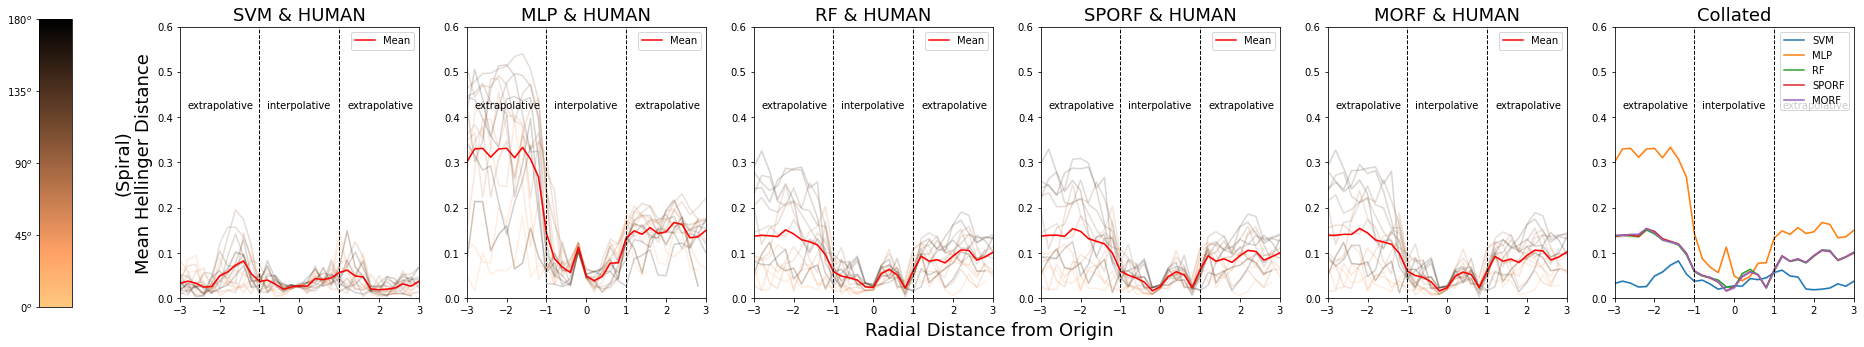

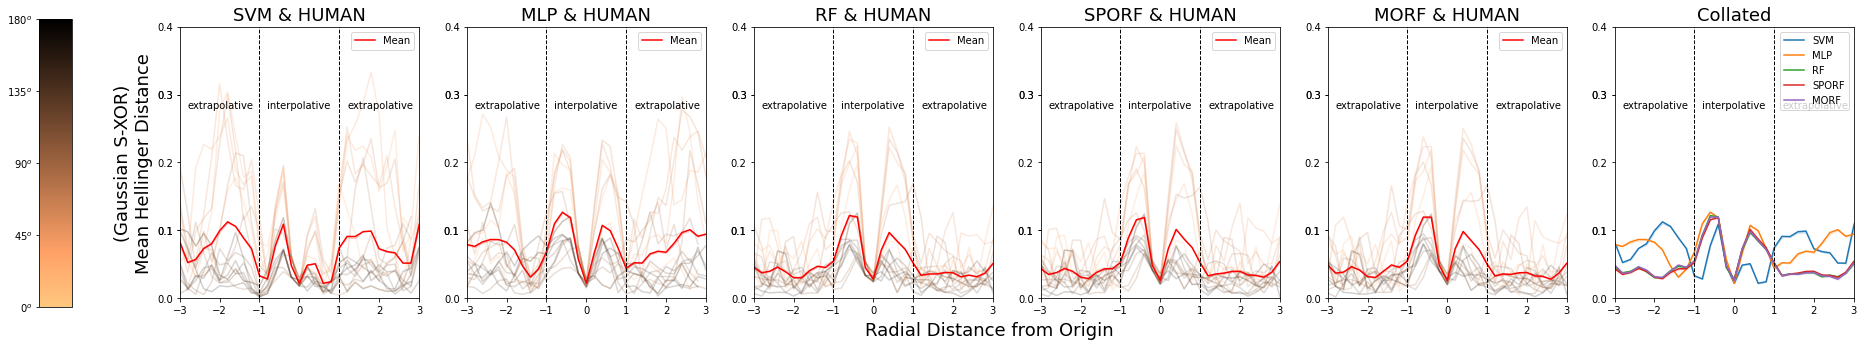

In [43]:
mpl.rcParams['text.usetex'] = False

panel_num = len(label)
mean_lines = []

for j, dt in enumerate(dtype):

    fig, ax = plt.subplots(1, panel_num, figsize=[5*panel_num, 5])
    plt.locator_params(axis="y", nbins=5)
    t_ylim = 0
    mean_lines.append([])

    for i in range(panel_num):

        if i == panel_num-1:
            #last panel
            for line in range(len(mean_lines[j])):
                mpl_lp = sns.lineplot(data=mean_lines[j][line], x='rad', y='value', ci=0, ax=ax[i], label=label[line])#, color='red')
            ax[i].set_title('Collated', fontsize=fsize)
            ax[i].set_xlim([-3,3])
        else:
            #calculating individual lines
            tempdf = pd.DataFrame(lp_temp[j,:,i])
            tempdf.columns = x_range

            if round(tempdf.max().max(),1) > t_ylim:
                t_ylim = round(tempdf.max().max()+0.05,1)

            sns.lineplot(data=tempdf.T, ax=ax[i], palette='copper_r', alpha=0.2, dashes=None)#, dashes=[(1,1) for i in range(len(angles))])

            ax[i].set_title(label[i] + ' & HUMAN', fontsize=fsize)
            ax[i].set_xlim([-3,3])

            #calculating the average
            tempdf = pd.DataFrame(lp_temp[j,:,i])
            tempdf.columns = x_range
            tempdf2 = tempdf.T
            tempdf2['rad'] = tempdf.T.index.to_numpy()
            tempdf2.columns = [f'{i}' for i in range(len(angles))] + ['rad']
            tempdf3 = tempdf2
            tempdf3 = pd.melt(tempdf3, 'rad')
            mean_lines[j].append(tempdf3)

            sns.lineplot(data=tempdf3, x='rad', y='value', ci=0, ax=ax[i], color='red')

        if i != panel_num-1:
            ax[i].legend().remove()
            ax[i].legend([Line2D([0], [0], color='red')], ['Mean'])#, bbox_to_anchor=(3.7+1.2,0.58))
        # else:
            # ax[i].legend(angles, bbox_to_anchor=(3.7,0.98), title='Angles') #depreciated (adds complete list of angles)

    for i in range(panel_num):
        ax[i].set_ylim([0, t_ylim])
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
        ax[i].yaxis.set_ticks(np.linspace(0, t_ylim, num=7).round(1))
        ax[i].axvline(x=1, lw=1, ls='--', color='black')
        ax[i].axvline(x=-1, lw=1, ls='--', color='black')
        temp_ylim = ax[i].get_ylim()[1] * 0.7
        ax[i].text(-0.8,temp_ylim,'interpolative',fontsize=10)
        ax[i].text(-2.8,temp_ylim,'extrapolative',fontsize=10)
        ax[i].text(1.2,temp_ylim,'extrapolative',fontsize=10)

    # left colorbar specification
    tick_n = 5
    mpl.rcParams['text.usetex'] = True #throws an error when globally activated
    ticks = [i + r'$^{o}$' for i in np.linspace(0, 180, tick_n).astype(int).astype(str)]
    mpl.rcParams['text.usetex'] = False

    cax = plt.axes([0.06, 0.1, 0.015, 0.8])
    cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap='copper_r'), cax=cax)

    # parameters need to be set after colorbar is generated
    cax.yaxis.set_label_position('left')
    cax.yaxis.set_ticks_position('left')
    cbar.ax.locator_params(nbins=tick_n-1)
    cax.yaxis.set_ticklabels(ticks)

    ax[0].set_ylabel(f'({dt})\nMean Hellinger Distance', fontsize=fsize)
    fig.supxlabel('Radial Distance from Origin', fontsize=fsize)

    if SAVEFIG:
        plt.savefig(f'figs/[20210921_20210921_add_oblique_trees_to_figures]_figure3_hellinger_{dtype[j]}_{str(ib.date.date())}.jpg', bbox_inches='tight')

### Class 1 Posterior Line Plot

In [44]:
np.array(mtype).shape

(2, 6, 3600)

In [45]:
angle_step = 12 #default = 12
new_dtype = ['Original'] + dtype
fdtype = ['spiral', 'sxor'] #dtype defined for filename

palette = sns.color_palette('bright', len(ib.mtype))

col = 1
row = 1

step = 0.2
r = 4
x_range = np.arange(-r,r,step)
angles = np.arange(0, 180+angle_step, angle_step)
# angles = np.array([0,180]) #just to check to see if 0 and 180 yields the same results

line_plots_post = []
line_posts_post = []

for deg in tqdm(angles):

    line_plot_post = []
    line_post_post = []

    #selecting linear region of interest over hellinger distance at given degree of angle
    for i in tqdm(range(2), leave=False):
        line_plot_post.append([])
        line_post_post.append([])

        for j in range(len(label)):
            line_plot_post[i].append([])
            line_post_post[i].append(ib.select_linear_region(mtype[i][j], degree=deg, step=0.001))

            lp, li = line_post_post[i][j] #line posterior, line index
            x = ib.mask[li][:,0]
            y = ib.mask[li][:,1]
            dist = np.sqrt(x**2 + y**2)

            dist[y < 0] *= -1 # negative radial distance wrt y-coordinate

            for rad in x_range:
                line_plot_post[i][j].append(np.array(lp[(dist >= rad) * (dist < rad+step)]).mean())

    line_plots_post.append(line_plot_post)
    line_posts_post.append(line_post_post)

100%|██████████| 16/16 [00:16<00:00,  1.02s/it]


In [46]:
# n x m x o x p multidimentional matrix where n is N_angle, m is N_data, o is N_algo, and p is N_rad
line_plots_post = np.array(line_plots_post)
line_plots_post.shape

(16, 2, 6, 40)

In [47]:
lp_temp = np.swapaxes(line_plots_post,0,1)
lp_temp[0,:,0].shape

(16, 40)

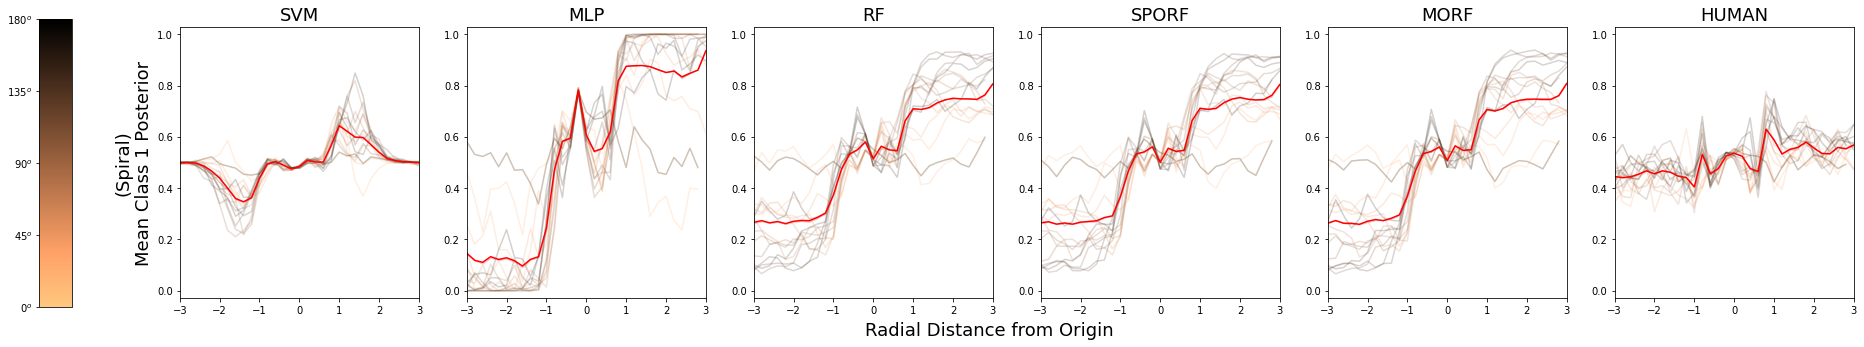

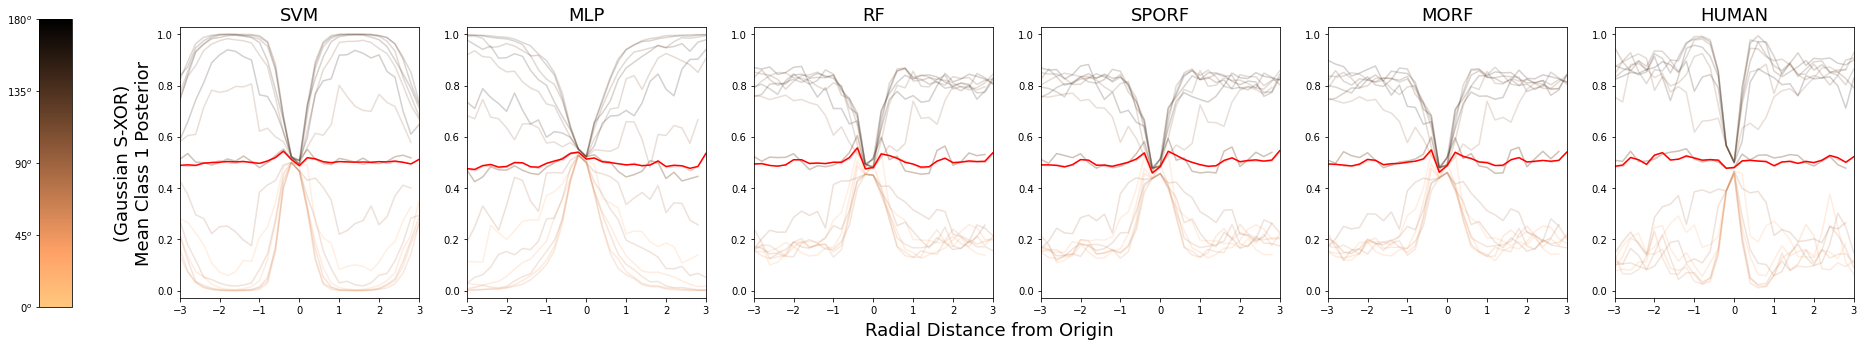

In [52]:
mpl.rcParams['text.usetex'] = False
pn = len(label) #number of panels

for j, dt in enumerate(dtype):
    
    fig, ax = plt.subplots(1,pn, figsize=[5*pn,5])
    plt.locator_params(axis="y", nbins=5)
    t_ylim = 0

    for i in range(len(label)):

        #calculating individual lines
        tempdf = pd.DataFrame(lp_temp[j,:,i])
        tempdf.columns = x_range

        if round(tempdf.max().max(),1) > t_ylim:
            t_ylim = round(tempdf.max().max()+0.05,1)

        sns.lineplot(data=tempdf.T, ax=ax[i], palette='copper_r', alpha=0.2, dashes=None)#, dashes=[(1,1) for i in range(len(angles))])

        ax[i].set_title(label[i], fontsize=fsize)
        ax[i].set_xlim([-3,3])

        #calculating the average
        tempdf = pd.DataFrame(lp_temp[j,:,i])
        tempdf.columns = x_range
        tempdf2 = tempdf.T
        tempdf2['rad'] = tempdf.T.index.to_numpy()
        tempdf2.columns = [f'{i}' for i in range(len(angles))] + ['rad']
        tempdf3 = tempdf2
        tempdf3 = pd.melt(tempdf3, 'rad')

        sns.lineplot(data=tempdf3, x='rad', y='value', ci=0, ax=ax[i], color='red')

        if i > 0:
            ax[i].legend().remove()
        else:
            # ax[i].legend(angles, bbox_to_anchor=(3.7,0.98), title='Angles') #depreciated (adds complete list of angles)
            # ax[i].legend([Line2D([0], [0], color='red')], ['Mean'], bbox_to_anchor=(3.7+1.2,0.58+0.0))
            ax[i].legend().remove()

    for i in range(pn):
        ax[i].set_ylim([0-0.03, t_ylim+0.03])
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
        ax[i].yaxis.set_ticks(np.linspace(0, t_ylim, num=6).round(1))

    # left colorbar specification
    tick_n = 5
    mpl.rcParams['text.usetex'] = True #throws an error when globally activated
    ticks = [i + r'$^{o}$' for i in np.linspace(0, 180, tick_n).astype(int).astype(str)]
    mpl.rcParams['text.usetex'] = False
    
    cax = plt.axes([0.06, 0.1, 0.015, 0.8])
    cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap='copper_r'), cax=cax)

    # parameters need to be set after colorbar is generated
    cax.yaxis.set_label_position('left')
    cax.yaxis.set_ticks_position('left')
    cbar.ax.locator_params(nbins=tick_n-1)
    cax.yaxis.set_ticklabels(ticks)

    ax[0].set_ylabel(f'({dt})\nMean Class 1 Posterior', fontsize=fsize)
    fig.supxlabel('Radial Distance from Origin', fontsize=fsize)

    if SAVEFIG:
        plt.savefig(f'figs/[20210921_add_oblique_trees_to_figures]_figure3_posterior_{dtype[j]}_{str(ib.date.date())}.jpg', bbox_inches='tight')